In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

/home/blevac/anaconda3/envs/edm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
result_file = '/home/blevac/Diffusion_Inverse/cs_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
diff_recon = cont['recon']
meas = cont['meas']
cs_utils = cont['forward_utils']
adj_img = cs_utils.adjoint(meas)
print(cont['nrmse'])

dict_keys(['gt_img', 'recon', 'meas', 'forward_utils', 'nrmse'])
0.11345729224385803


In [34]:
print(cs_utils.A.shape)
A_pinv = torch.linalg.pinv(cs_utils.A)
print(A_pinv.shape)
pinv_recon = torch.matmul(meas,A_pinv)
pinv_recon = pinv_recon.reshape(1,3,64,64)
print(pinv_recon.shape)

torch.Size([4096, 1024])
torch.Size([1024, 4096])
torch.Size([1, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


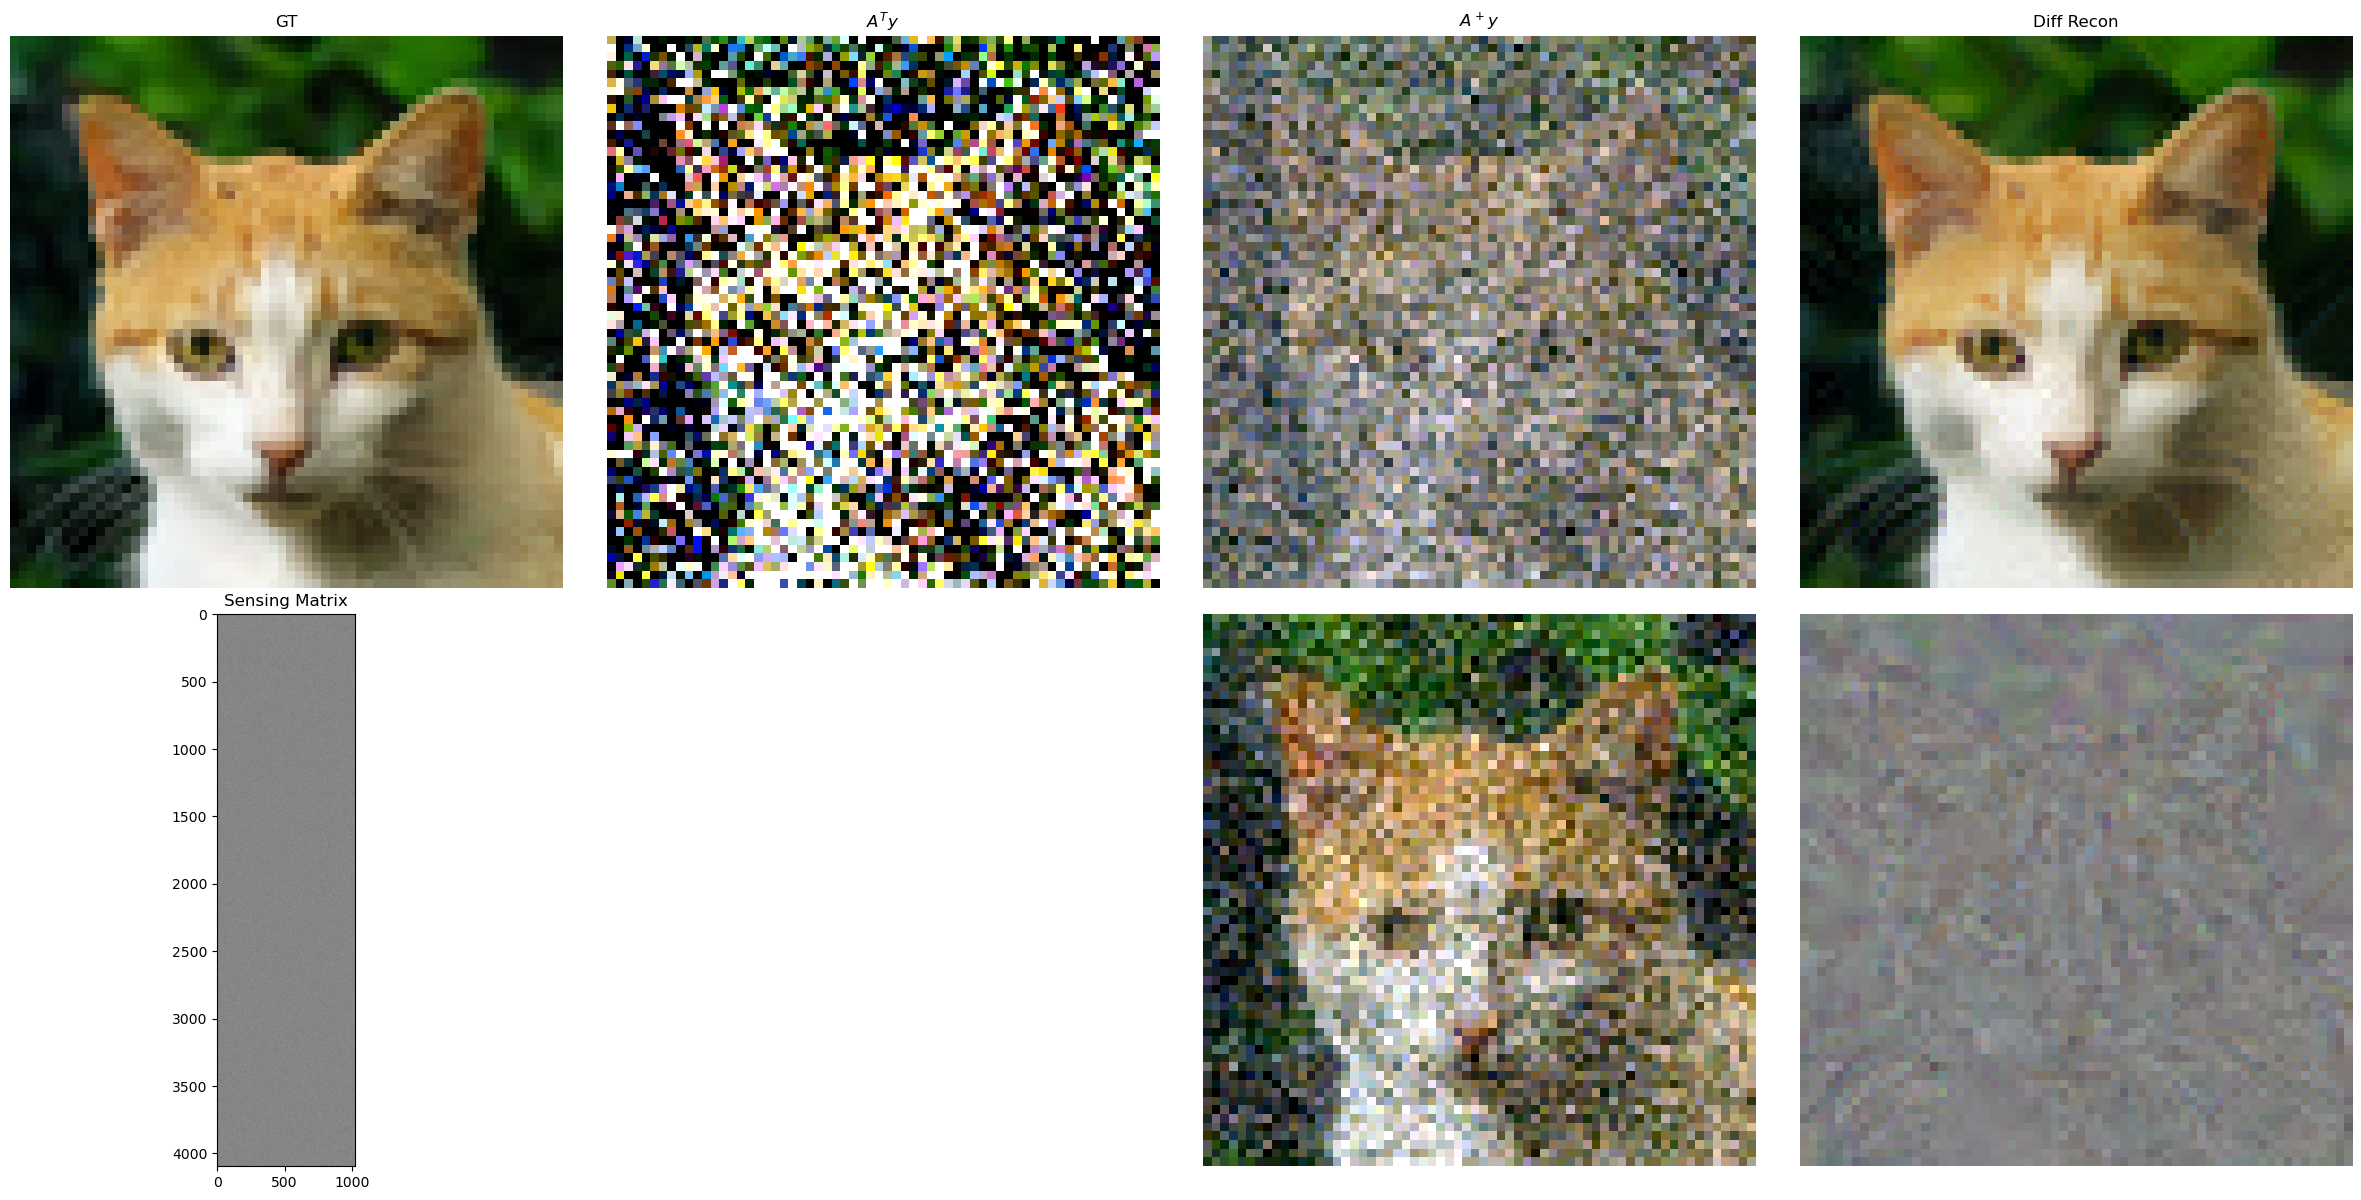

In [35]:
plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
plt.title('GT')
plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,5)
plt.title('Sensing Matrix')
plt.imshow((cs_utils.A.cpu()+1)/2,cmap='gray')
# plt.axis('off')

plt.subplot(2,4,2)
plt.title('$A^Ty$')
plt.imshow((adj_img[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(((gt_img-adj_img)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
plt.axis('off')

plt.subplot(2,4,3)
plt.title('$A^+y$')
plt.imshow((pinv_recon[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(((gt_img-pinv_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
plt.axis('off')

plt.subplot(2,4,4)
plt.title('Diff Recon')
plt.imshow((diff_recon[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
plt.axis('off')
plt.tight_layout(pad=1.0)
